<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-statement" data-toc-modified-id="Problem-statement-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Problem statement</a></span><ul class="toc-item"><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span></li><li><span><a href="#Data-visualization" data-toc-modified-id="Data-visualization-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data visualization</a></span></li><li><span><a href="#Navie-bayes-model-fitting" data-toc-modified-id="Navie-bayes-model-fitting-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Navie bayes model fitting</a></span><ul class="toc-item"><li><span><a href="#Gaussian-navie-bayes" data-toc-modified-id="Gaussian-navie-bayes-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Gaussian navie bayes</a></span></li><li><span><a href="#Multinomial-navie-bayes" data-toc-modified-id="Multinomial-navie-bayes-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Multinomial navie bayes</a></span></li><li><span><a href="#Bernouli-navie-bayes" data-toc-modified-id="Bernouli-navie-bayes-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Bernouli navie bayes</a></span></li></ul></li></ul></li></ul></div>

### Problem statement 

In [1]:
# Necessary libraries
import pandas as pd
import numpy as np

# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Model libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

# Evaluation
from sklearn.metrics import confusion_matrix, classification_report

# Warnings
import warnings
warnings.filterwarnings('ignore')

#### Exploratory Data Analysis

In [2]:
# Loading dataset 

train = pd.read_csv(r".\SalaryData_Train.csv")
test = pd.read_csv(r".\SalaryData_Test.csv")

# Glance of train and test data
print(train.head())
print()
print(test.head())

   age          workclass   education  educationno        maritalstatus  \
0   39          State-gov   Bachelors           13        Never-married   
1   50   Self-emp-not-inc   Bachelors           13   Married-civ-spouse   
2   38            Private     HS-grad            9             Divorced   
3   53            Private        11th            7   Married-civ-spouse   
4   28            Private   Bachelors           13   Married-civ-spouse   

           occupation    relationship    race      sex  capitalgain  \
0        Adm-clerical   Not-in-family   White     Male         2174   
1     Exec-managerial         Husband   White     Male            0   
2   Handlers-cleaners   Not-in-family   White     Male            0   
3   Handlers-cleaners         Husband   Black     Male            0   
4      Prof-specialty            Wife   Black   Female            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1           

In [3]:
#1 Shape of dataset
print('Train', train.shape)
print('Test', test.shape)

Train (30161, 14)
Test (15060, 14)


In [4]:
#2 Technical information 
# Train
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [5]:
# Test
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [6]:
#3 Presence of null values
# Train
train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [7]:
# Test
test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [8]:
#4. Duplicate values
# Train
train.duplicated().sum()

3258

In [9]:
train = train.drop_duplicates()

In [10]:
# Test
test.duplicated().sum()

930

In [11]:
test = test.drop_duplicates()

In [12]:
#5 Statistical summary
# Train
train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,26903.000000,26903.000000,26903.000000,26903.000000,26903.000000
mean,39.049140,10.144296,1215.443259,98.427499,41.164591
std,13.188825,2.620154,7805.366384,425.493211,12.347051
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,29.000000,9.000000,0.000000,0.000000,40.000000
50%,38.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [13]:
# Test
test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,14130.000000,14130.000000,14130.000000,14130.000000,14130.000000
mean,39.155414,10.120736,1185.899292,94.499646,41.073885
std,13.429544,2.602557,7903.191981,417.955786,12.268036
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,29.000000,9.000000,0.000000,0.000000,40.000000
50%,38.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


#### Data visualization

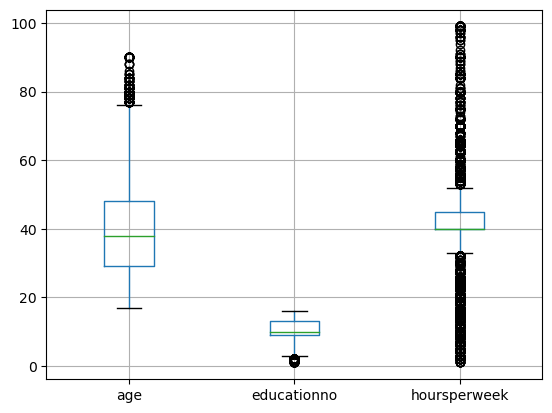

In [14]:
#6 Presence of ouliers
# Train

train.drop(['capitalgain', 'capitalloss'], axis=1).boxplot()
plt.show()

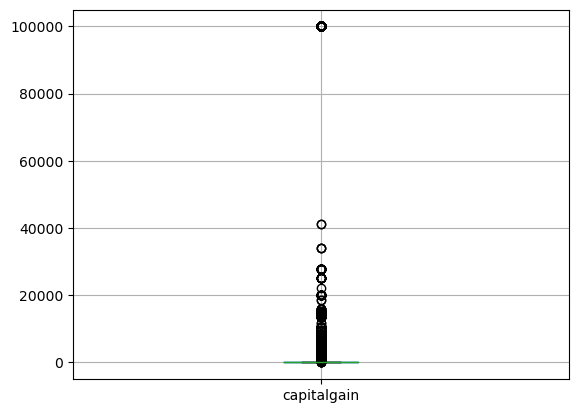

In [15]:
pd.DataFrame(train['capitalgain']).boxplot()

plt.show()

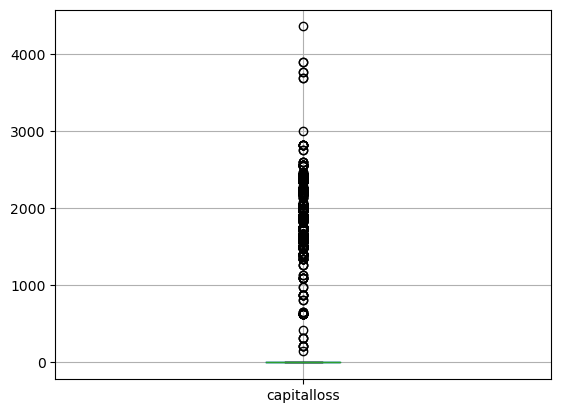

In [16]:
pd.DataFrame(train['capitalloss']).boxplot()
plt.show()

In [17]:
#7 Unique values
train.nunique()

age               72
workclass          7
education         16
educationno       16
maritalstatus      7
occupation        14
relationship       6
race               5
sex                2
capitalgain      118
capitalloss       90
hoursperweek      94
native            40
Salary             2
dtype: int64

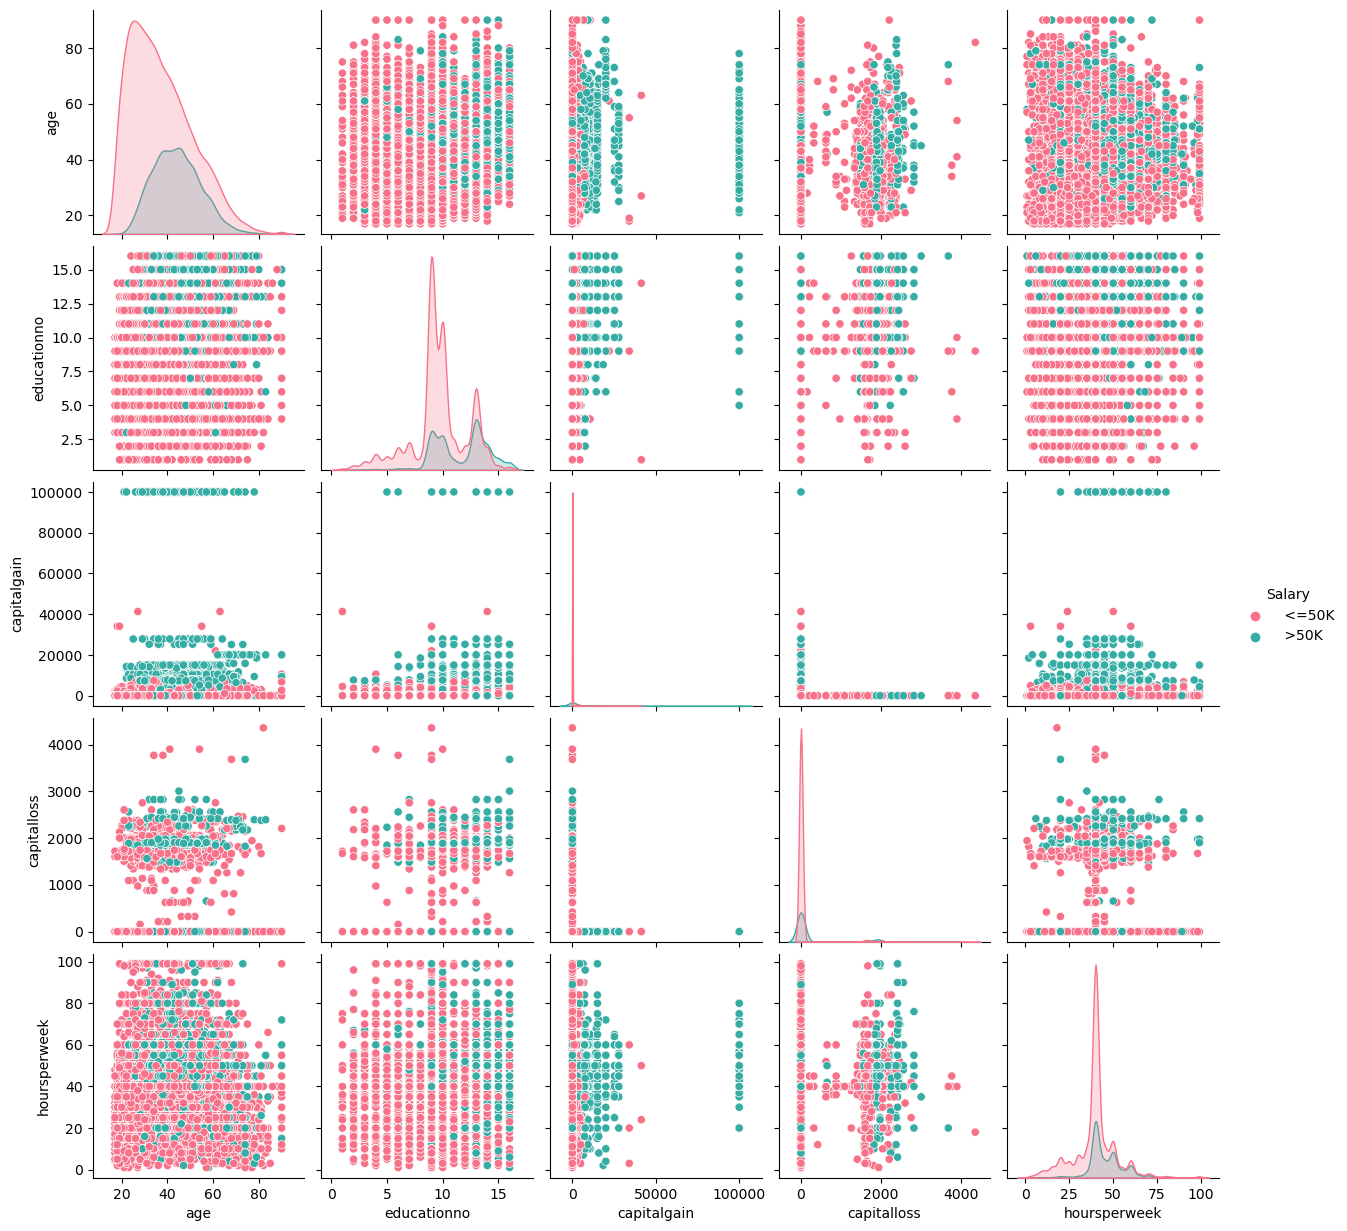

In [18]:
# Visualisation of dataset distribution

sns.pairplot(data=train, kind='scatter', diag_kind='kde', hue='Salary', palette='husl')
plt.show()

Observation:
1. Dataset has 14 columns. Train set size(30161, 14) and Test set size (15060, 14).
2. No null values are present.
3. Duplicate values are present and removed.
4. Outliers are present in the dataset.
5. Columns capitalgain, capitalloss not related to Salary and educationno is representation of education column. So, these columns needs to be removed before model fitting. 
6. Dataset has categorical values and needs to be converted to numerical form. 

In [19]:
# Convertion of categorical data to numerical form
encoder=LabelEncoder()

# Train data
train['workclass'] = encoder.fit_transform(train['workclass'])
train['education'] = encoder.fit_transform(train['education'])
train['maritalstatus'] = encoder.fit_transform(train['maritalstatus'])
train['occupation'] = encoder.fit_transform(train['occupation'])
train['relationship'] = encoder.fit_transform(train['relationship'])
train['race'] = encoder.fit_transform(train['race'])
train['sex'] = encoder.fit_transform(train['sex'])
train['native'] = encoder.fit_transform(train['native'])
train['Salary'] = encoder.fit_transform(train['Salary'])

In [20]:
# Test data
test['workclass'] = encoder.fit_transform(test['workclass'])
test['education'] = encoder.fit_transform(test['education'])
test['maritalstatus'] = encoder.fit_transform(test['maritalstatus'])
test['occupation'] = encoder.fit_transform(test['occupation'])
test['relationship'] = encoder.fit_transform(test['relationship'])
test['race'] = encoder.fit_transform(test['race'])
test['sex'] = encoder.fit_transform(test['sex'])
test['native'] = encoder.fit_transform(test['native'])
test['Salary'] = encoder.fit_transform(test['Salary'])

In [21]:
# Features selection
# Train
x_train = train.drop(["capitalgain", "capitalloss", "educationno", 'Salary'], axis=1)
y_train = train['Salary']

# Test
x_test = test.drop(["capitalgain", "capitalloss", "educationno", 'Salary'], axis=1)
y_test = test['Salary']

#### Navie bayes model fitting

##### Gaussian navie bayes

In [22]:
# Gaussian navie bayes model
gnb = GaussianNB()
gnb.fit(x_train, y_train)
predictions = gnb.predict(x_test)

# Evaluation of model
cm = confusion_matrix(y_test, predictions)
print('Confusion matrix: ')
print(cm)
print()
print('Classification report: ')
clr = classification_report(y_test, predictions)
print(clr)

Confusion matrix: 
[[8318 2302]
 [1107 2403]]

Classification report: 
              precision    recall  f1-score   support

           0       0.88      0.78      0.83     10620
           1       0.51      0.68      0.59      3510

    accuracy                           0.76     14130
   macro avg       0.70      0.73      0.71     14130
weighted avg       0.79      0.76      0.77     14130



##### Multinomial navie bayes

In [23]:
# Multinomial navie bayes model
mnb = MultinomialNB()
mnb.fit(x_train, y_train)
predictions = mnb.predict(x_test)

# Evaluation of model
cm = confusion_matrix(y_test, predictions)
print('Confusion matrix: ')
print(cm)
print()
print('Classification report: ')
clr = classification_report(y_test, predictions)
print(clr)

Confusion matrix: 
[[8047 2573]
 [1440 2070]]

Classification report: 
              precision    recall  f1-score   support

           0       0.85      0.76      0.80     10620
           1       0.45      0.59      0.51      3510

    accuracy                           0.72     14130
   macro avg       0.65      0.67      0.65     14130
weighted avg       0.75      0.72      0.73     14130



##### Bernouli navie bayes

In [24]:
# Bernouli navie bayes model
bnb = BernoulliNB()
bnb.fit(x_train, y_train)
predictions = bnb.predict(x_test)

# Evaluation of model
cm = confusion_matrix(y_test, predictions)
print('Confusion matrix: ')
print(cm)
print()
print('Classification report: ')
clr = classification_report(y_test, predictions)
print(clr)

Confusion matrix: 
[[7834 2786]
 [ 996 2514]]

Classification report: 
              precision    recall  f1-score   support

           0       0.89      0.74      0.81     10620
           1       0.47      0.72      0.57      3510

    accuracy                           0.73     14130
   macro avg       0.68      0.73      0.69     14130
weighted avg       0.78      0.73      0.75     14130

